In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import json

In [10]:
PARENT_PATH = os.path.join("..")
DATA_CSV = os.path.join(PARENT_PATH, "data", "data.csv")
RESULT_CSV = os.path.join(PARENT_PATH, "data", "analyzed.csv")
TAGS_TXT = os.path.join(PARENT_PATH, "data", "tags.txt")
MIN_TEXT_LEN = 2500

In [11]:
df = pd.read_csv(DATA_CSV)

In [12]:
df = df[["id", "text", "tags"]].dropna()

In [13]:
df["size"] = df[["text"]].apply(lambda row: len(row["text"]), axis=1)
df = df.loc[df['size'] >= MIN_TEXT_LEN]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79104 entries, 1 to 668256
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      79104 non-null  int64 
 1   text    79104 non-null  object
 2   tags    79104 non-null  object
 3   size    79104 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 3.0+ MB


In [22]:
df = df[["text", "tags"]]

In [23]:
df.head()

,text,tags
1,"\nПисатель и критик соотносятся так же, как ...","['Не мое', 'Чтение', 'Книги', 'Литература', 'Д..."
2,"Привет всем пикабушникам, этим холодным 1-се...","['Компьютер', 'Компьютерщики', 'Компьютерное ж..."
5,\nА она идеальна! От щиколоток до кончиков р...,"['[моё]', 'Советы 30-летнего', 'Френдзона', 'О..."
6,\nПродолжаю истории про моего друга.Естестве...,"['[моё]', 'Китай', 'Таможня', 'Деньги', 'Истор..."
11,"История не то, чтобы юмористическая, но посм...","['История', 'Деньги', 'Сложный выбор', 'Текст'..."


In [24]:
df.to_csv(RESULT_CSV, columns=["text", "tags"])

In [52]:
def get_tags_string(data):
    res = dict()
    for row in data:
        arr = row.strip("[]").replace("'", "").split(', ')
        
        for item in arr:
            if item in res:
                res[item] += 1
            else:
                res[item] = 1
    return res

In [53]:
tags_dict = get_tags_string(df['tags'].values)

In [54]:
sort_tags_dict = sorted(tags_dict.items(), key=lambda x: x[1], reverse=True)

In [55]:
EXPLORE_TAG_COUNT = 15

In [56]:
tags = sort_tags_dict[0:EXPLORE_TAG_COUNT]

x = []
x_label = []

for i in tags:
    x_label.append(i[0])
    x.append(i[1])

([<matplotlib.axis.XTick at 0x12c5b82e0>,
 [Text(0, 0, 'Текст'),
  Text(1, 0, 'Длиннопост'),
  Text(2, 0, '[моё]'),
  Text(3, 0, 'Рассказ'),
  Text(4, 0, 'История'),
  Text(5, 0, 'Украина'),
  Text(6, 0, 'Россия'),
  Text(7, 0, 'Политика'),
  Text(8, 0, 'Моё'),
  Text(9, 0, 'Не мое'),
  Text(10, 0, 'Юмор'),
  Text(11, 0, 'Длиннотекст'),
  Text(12, 0, 'Работа'),
  Text(13, 0, 'Крипота'),
  Text(14, 0, 'Мат')])

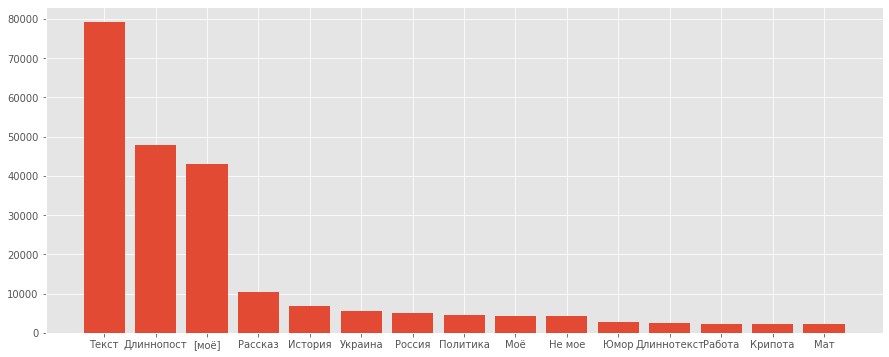

In [57]:
fig = plt.figure(figsize=(15, 6))
plt.style.use('ggplot')
plt.bar(range(len(x)), x)
plt.xticks(range(len(x)), x_label)

In [58]:
main_tags = sort_tags_dict[3:20]

y = []
y_label = []

for i in main_tags:
    y_label.append(i[0][0:9] + "...")
    y.append(i[1])

([<matplotlib.axis.XTick at 0x12ea01a60>,
 [Text(0, 0, 'Рассказ...'),
  Text(1, 0, 'История...'),
  Text(2, 0, 'Украина...'),
  Text(3, 0, 'Россия...'),
  Text(4, 0, 'Политика...'),
  Text(5, 0, 'Моё...'),
  Text(6, 0, 'Не мое...'),
  Text(7, 0, 'Юмор...'),
  Text(8, 0, 'Длиннотек...'),
  Text(9, 0, 'Работа...'),
  Text(10, 0, 'Крипота...'),
  Text(11, 0, 'Мат...'),
  Text(12, 0, 'Жизнь...'),
  Text(13, 0, 'Истории и...'),
  Text(14, 0, 'Отношения...'),
  Text(15, 0, 'Дети...'),
  Text(16, 0, 'США...')])

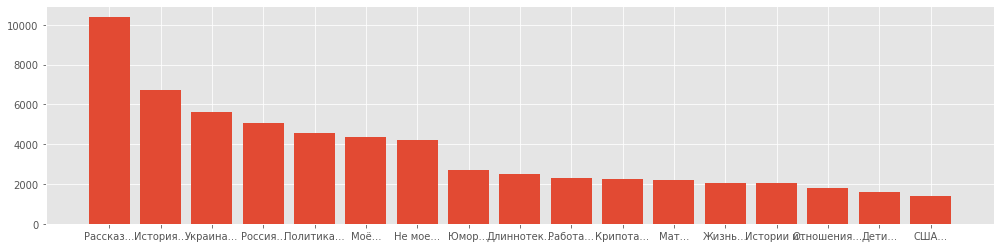

In [59]:
fig = plt.figure(figsize=(17, 4))
plt.style.use('ggplot')
plt.bar(range(len(y)), y)
plt.xticks(range(len(y)), y_label)

In [60]:
TAGS = [x[0] for x in main_tags]

In [61]:
TAGS

['Рассказ',
 'История',
 'Украина',
 'Россия',
 'Политика',
 'Моё',
 'Не мое',
 'Юмор',
 'Длиннотекст',
 'Работа',
 'Крипота',
 'Мат',
 'Жизнь',
 'Истории из жизни',
 'Отношения',
 'Дети',
 'США']

In [62]:
with open(TAGS_TXT, 'w') as fw:
    json.dump(TAGS, fw)